<a href="https://colab.research.google.com/github/sakshi1989/Machine_Learning_Practices/blob/main/LogisticRegression_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

**Reading the CSV data into DataFrame**

In [ ]:
# Load the data from the File into the dataframe
initial_load_dfSG = pd.read_csv("inq2021.csv")
initial_load_dfSG.head()

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
0,C,N,NaN,NaN,0,21-May-21,1,0,0,1,...,0,0,0,4,0.017183,0.02038,0.037652,NaN,NaN,N
1,C,N,NaN,NaN,0,15-Feb-20,1,0,0,1,...,0,0,1,19,0.017183,0.02038,0.037652,NaN,NaN,N
2,B,N,NaN,NaN,0,9-Jun-19,2,2,0,0,...,0,0,0,27,0.017183,0.02038,0.037652,NaN,NaN,N
3,NaN,N,NaN,NaN,0,25-Nov-18,3,2,1,0,...,0,0,1,34,0.017183,0.02038,0.037652,NaN,NaN,N
4,NaN,N,NaN,NaN,0,6-Dec-17,1,1,0,0,...,0,0,1,45,0.017183,0.02038,0.037652,NaN,NaN,N


In [ ]:
# Make a copy of the dataframe, to keep the actual records intact
# Remove the mentioned independent features  - ACADEMIC_INTEREST_1, ACADEMIC_INTEREST_2, IRSCHOOL, CONTACT_CODE1 and CONTACT_DATE
copy_initial_load_dfSG = initial_load_dfSG.drop(columns=['ACADEMIC_INTEREST_1', 'ACADEMIC_INTEREST_2', 'IRSCHOOL', 'CONTACT_CODE1','CONTACT_DATE']).copy()
copy_initial_load_dfSG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ETHNICITY           71772 non-null  object 
 1   TERRITORY           91481 non-null  object 
 2   Enroll              91482 non-null  int64  
 3   TOTAL_CONTACTS      91482 non-null  int64  
 4   SELF_INIT_CNTCTS    91482 non-null  int64  
 5   TRAVEL_INIT_CNTCTS  91482 non-null  int64  
 6   SOLICITED_CNTCTS    91482 non-null  int64  
 7   REFERRAL_CNTCTS     91482 non-null  int64  
 8   CAMPUS_VISIT        91482 non-null  int64  
 9   LEVEL_YEAR          91482 non-null  object 
 10  satscore            27003 non-null  float64
 11  sex                 87649 non-null  float64
 12  mailq               91482 non-null  int64  
 13  telecq              20602 non-null  float64
 14  premiere            91482 non-null  int64  
 15  interest            91482 non-null  int64  
 16  stuc

**Exploratory Data Analysis, Imputation & Transformation**

In [ ]:
# Find the Percentage of missing values in the data for each feature
round((copy_initial_load_dfSG.isnull().sum()/len(copy_initial_load_dfSG)) * 100 ,2)

ETHNICITY             21.55
TERRITORY              0.00
Enroll                 0.00
TOTAL_CONTACTS         0.00
SELF_INIT_CNTCTS       0.00
TRAVEL_INIT_CNTCTS     0.00
SOLICITED_CNTCTS       0.00
REFERRAL_CNTCTS        0.00
CAMPUS_VISIT           0.00
LEVEL_YEAR             0.00
satscore              70.48
sex                    4.19
mailq                  0.00
telecq                77.48
premiere               0.00
interest               0.00
stucar                 0.00
init_span              0.00
int1rat                0.00
int2rat                0.00
hscrat                 0.00
avg_income            22.88
distance              21.28
Instate                0.00
dtype: float64

In [ ]:
# We can see, features- satscore and telecq have high % of missing values and cannot be imputed so we will drop them
copy_initial_load_dfSG = copy_initial_load_dfSG.drop(columns=['satscore','telecq'])
copy_initial_load_dfSG.describe(include='all')

,ETHNICITY,TERRITORY,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,LEVEL_YEAR,...,premiere,interest,stucar,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,70553.000000,72014.000000,91482
unique,7,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,0.031350,2.166098,1.214119,0.364815,0.547222,0.039899,0.034673,NaN,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,0.174264,1.852537,1.666529,0.557067,0.649426,0.226191,0.187322,NaN,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,20608.888129,397.978831,NaN
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,32045.000000,114.471414,NaN
50%,NaN,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,42324.000000,183.546674,NaN
75%,NaN,NaN,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,57314.000000,539.432855,NaN


In [ ]:
# init_span have the min value in negative, let us observe how many values are less than, 0 as this value cannot be in negative
print(copy_initial_load_dfSG[copy_initial_load_dfSG['init_span'] < 0].shape[0])

# Set this one value with the minimum of init_span which is greater than 0
copy_initial_load_dfSG.loc[copy_initial_load_dfSG['init_span'] < 0,'init_span'] = copy_initial_load_dfSG[copy_initial_load_dfSG['init_span'] > 0]['init_span'].min()

1


In [ ]:
# Check unique values for the categorical features, which would further require dummy encoding
for col in copy_initial_load_dfSG.select_dtypes(include='object').columns:
  print(f"The unique values for {col} : {copy_initial_load_dfSG[col].unique()}")


The unique values for ETHNICITY : ['C' 'B' nan 'N' 'O' 'H' 'A' 'I']
The unique values for TERRITORY : ['N' '1' '8' '5' '6' 'A' '2' '7' '0' '4' nan '3']
The unique values for LEVEL_YEAR : ['FR21']
The unique values for Instate : ['N' 'Y']


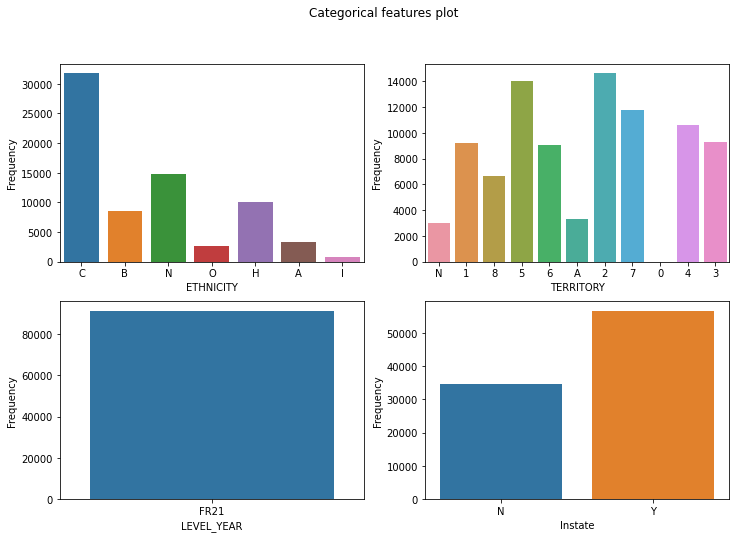

In [ ]:
# Plot the count of each categorical variable
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('Categorical features plot')
counter = 1
for col in copy_initial_load_dfSG.select_dtypes(include='object').columns:  
  if counter == 1 :  
    sns.countplot(ax=axs[0,0],x = col, data = copy_initial_load_dfSG)
    axs[0,0].set_ylabel("Frequency")
  elif counter == 2 :
    sns.countplot(ax=axs[0,1],x = col, data = copy_initial_load_dfSG )
    axs[0,1].set_ylabel("Frequency")
  elif counter == 3 : 
    sns.countplot(ax=axs[1,0],x = col, data = copy_initial_load_dfSG )
    axs[1,0].set_ylabel("Frequency")
  elif counter == 4 : 
    sns.countplot(ax=axs[1,1],x = col, data = copy_initial_load_dfSG )
    axs[1,1].set_ylabel("Frequency")
  counter += 1

In [ ]:
# Before encoding we can see the number of missing values in TERRITORY and impute it accordingly
print(copy_initial_load_dfSG[copy_initial_load_dfSG['TERRITORY'].isnull()].shape[0])

# As there is only 1 missing value we will impute it using mode
copy_initial_load_dfSG['TERRITORY'] = copy_initial_load_dfSG['TERRITORY'].fillna(copy_initial_load_dfSG['TERRITORY'].mode()[0])

1


In [ ]:
# I will remove the features - ETHNICITY (not to include bias in the model) & LEVEL_YEAR(no variation in the data)
copy_initial_load_dfSG = copy_initial_load_dfSG.drop(columns=['ETHNICITY','LEVEL_YEAR'])

# Fill the null values in sex with some constant value
copy_initial_load_dfSG['sex'] = copy_initial_load_dfSG['sex'].fillna(2.0)
# Convert the sex feature into category type so that dummy encoding can be done on it
copy_initial_load_dfSG['sex'] = copy_initial_load_dfSG['sex'].astype('category')

# dummy encoding the features - TERRITORY, Instate, sex
dummy_data_SG = pd.get_dummies(copy_initial_load_dfSG[['TERRITORY','Instate','sex']],drop_first=True)
dummy_data_SG.head()

,TERRITORY_1,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_Y,sex_1.0,sex_2.0
0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0


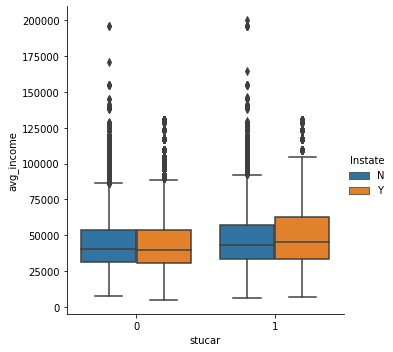

In [ ]:
# Data distribution between the car, avg_income and Instate
sns.catplot(data=copy_initial_load_dfSG.dropna(subset = ['avg_income']), x="stucar", y="avg_income", hue= 'Instate', kind="box")

In [ ]:
# Create a dataframe by combining numerical features and dummy encoded features
combine_dfSG = pd.concat([copy_initial_load_dfSG.drop(columns = ['TERRITORY','Instate','sex']), dummy_data_SG], axis=1 )
combine_dfSG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Enroll              91482 non-null  int64  
 1   TOTAL_CONTACTS      91482 non-null  int64  
 2   SELF_INIT_CNTCTS    91482 non-null  int64  
 3   TRAVEL_INIT_CNTCTS  91482 non-null  int64  
 4   SOLICITED_CNTCTS    91482 non-null  int64  
 5   REFERRAL_CNTCTS     91482 non-null  int64  
 6   CAMPUS_VISIT        91482 non-null  int64  
 7   mailq               91482 non-null  int64  
 8   premiere            91482 non-null  int64  
 9   interest            91482 non-null  int64  
 10  stucar              91482 non-null  int64  
 11  init_span           91482 non-null  int64  
 12  int1rat             91482 non-null  float64
 13  int2rat             91482 non-null  float64
 14  hscrat              91482 non-null  float64
 15  avg_income          70553 non-null  float64
 16  dist

In [ ]:
copy_initial_load_dfSG['avg_income'].skew(axis=0,skipna=True)

1.258230621416055

The skewness in avg_income is : 1.258

The distribution of avg_income before imputation : 


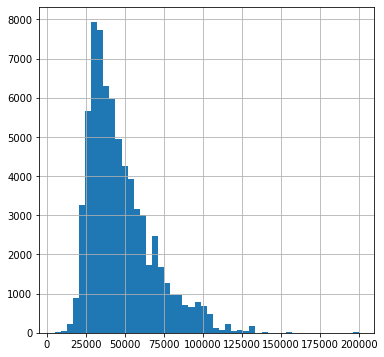

In [ ]:
# Distribution before the imputation and skewness
print(f"The skewness in avg_income is : {round(copy_initial_load_dfSG['avg_income'].skew(axis=0,skipna=True),3)}")
print()
print("The distribution of avg_income before imputation : ")
copy_initial_load_dfSG['avg_income'].hist(bins = 50, figsize=(6,6))

In [ ]:
# Impute avg_income with the mean to show how mean imputation can bump one value
copy_initial_load_dfSG['avg_income'] = copy_initial_load_dfSG['avg_income'].fillna(copy_initial_load_dfSG['avg_income'].mean())

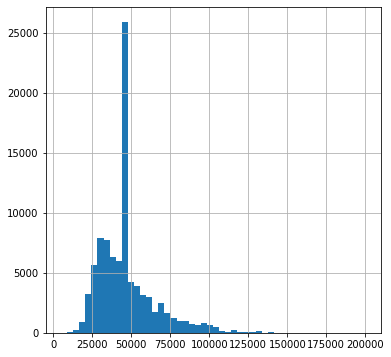

In [ ]:
# Check for the distribution of the data after mean imputation
copy_initial_load_dfSG['avg_income'].hist(bins = 50, figsize=(6,6))

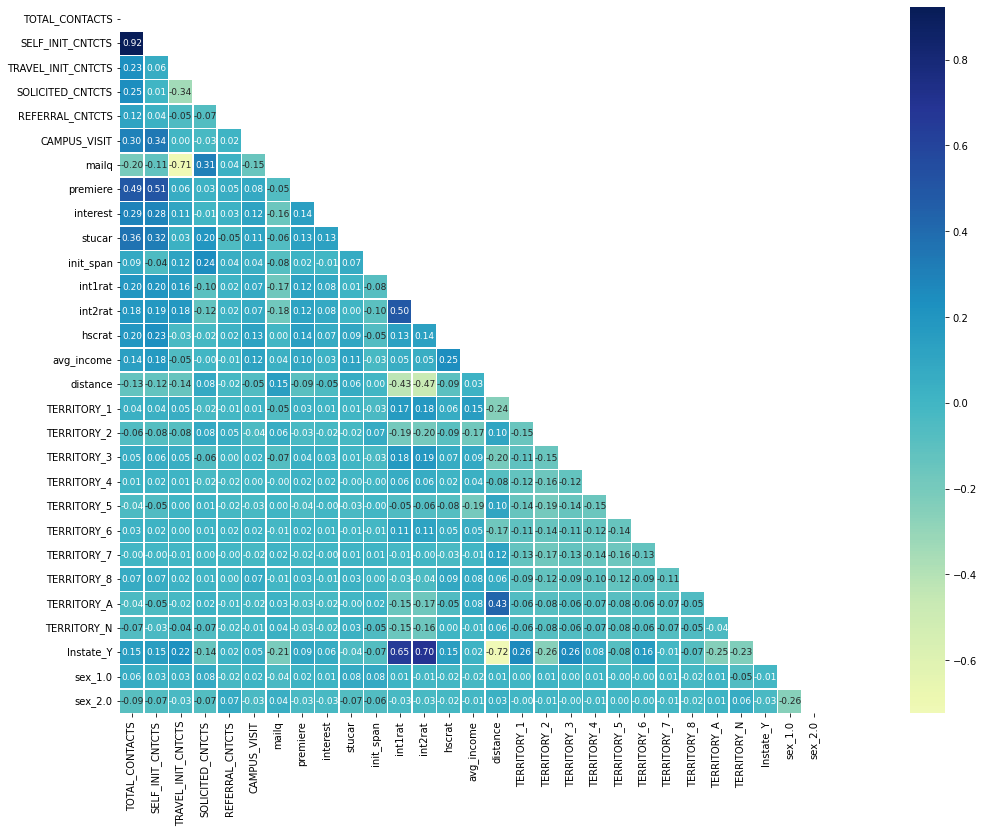

In [ ]:
# Create the correlation matrix, by not considering response feature 'Enroll'
plt.figure(figsize=(30,13))
corr = combine_dfSG.drop(columns = 'Enroll').corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap='YlGnBu', center=0,
            square=True,linewidths=.5,annot=True,fmt='.2f',
            annot_kws={
                        'fontsize': 9                        
                      }
           )

In [ ]:
# No. of rows where TOTAL_CONTACTS = SELF_INIT_CNTCTS + TRAVEL_INIT_CNTCTS + SOLICITED_CNTCTS + REFERRAL_CNTCTS
rows = combine_dfSG[combine_dfSG['TOTAL_CONTACTS'] == combine_dfSG['SELF_INIT_CNTCTS'] + combine_dfSG['TRAVEL_INIT_CNTCTS'] + combine_dfSG['SOLICITED_CNTCTS'] + \
                                                    combine_dfSG['REFERRAL_CNTCTS']].shape[0]
# dataset total rows
total_rows = len(combine_dfSG)
# No. of rows that did not matched
rows_not_matched = total_rows - rows
print(rows_not_matched)

4


In [ ]:
# As TOTAL_CONTACTS is highly positively correlated with SELF_INIT_CNTCTS, it would not be appropriate to keep TOTAL_CONTACTS,
# and also we can see almost all the records of TOTAL_CONTACTS can be explained by SELF_INIT_CNTCTS + TRAVEL_INIT_CNTCTS + SOLICITED_CNTCTS + REFERRAL_CNTCTS.
# Additionally, we will also drop 'distance' as it is highly negatively correlated with Instate_Y
combine_dfSG = combine_dfSG.drop(columns= ['TOTAL_CONTACTS','distance'])

In [ ]:
# Checking the VIF before Imputation & Transformation on the available data. 

vif_data1 = pd.DataFrame()
vif_data1["feature"] = combine_dfSG.columns.drop('Enroll')

# calculating VIF for each feature
vif_data1["VIF"] = [variance_inflation_factor(combine_dfSG.dropna(axis=0).drop(columns = 'Enroll').values, i) for i in range(len(combine_dfSG.drop(columns='Enroll').columns))]
print(vif_data1)


               feature        VIF
0     SELF_INIT_CNTCTS   2.919573
1   TRAVEL_INIT_CNTCTS   3.282035
2     SOLICITED_CNTCTS   2.163648
3      REFERRAL_CNTCTS   1.074329
4         CAMPUS_VISIT   1.263474
5                mailq  15.537905
6             premiere   1.453330
7             interest   1.174401
8               stucar   2.637330
9            init_span   7.172849
10             int1rat   5.404602
11             int2rat   7.103467
12              hscrat   1.620350
13          avg_income   7.579940
14         TERRITORY_1   5.791487
15         TERRITORY_2   6.501952
16         TERRITORY_3   5.941533
17         TERRITORY_4   6.167045
18         TERRITORY_5   6.661219
19         TERRITORY_6   5.117678
20         TERRITORY_7   6.432776
21         TERRITORY_8   3.943438
22         TERRITORY_A   2.359587
23         TERRITORY_N   1.010053
24           Instate_Y   7.991191
25             sex_1.0   2.814343
26             sex_2.0   1.141898


In [ ]:
# mailq also has the high VIF value, and is also negatively correlated with TRAVEL_INIT_CNTCTS so we will drop it
combine_dfSG = combine_dfSG.drop(columns= 'mailq')

In [ ]:
# Impute the missing values of avg_income using KNNImputer
imputer_SG = KNNImputer(n_neighbors=10)
combine_dfSG = pd.DataFrame(imputer_SG.fit_transform(combine_dfSG),columns = combine_dfSG.columns)
combine_dfSG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Enroll              91482 non-null  float64
 1   SELF_INIT_CNTCTS    91482 non-null  float64
 2   TRAVEL_INIT_CNTCTS  91482 non-null  float64
 3   SOLICITED_CNTCTS    91482 non-null  float64
 4   REFERRAL_CNTCTS     91482 non-null  float64
 5   CAMPUS_VISIT        91482 non-null  float64
 6   premiere            91482 non-null  float64
 7   interest            91482 non-null  float64
 8   stucar              91482 non-null  float64
 9   init_span           91482 non-null  float64
 10  int1rat             91482 non-null  float64
 11  int2rat             91482 non-null  float64
 12  hscrat              91482 non-null  float64
 13  avg_income          91482 non-null  float64
 14  TERRITORY_1         91482 non-null  float64
 15  TERRITORY_2         91482 non-null  float64
 16  TERR

In [ ]:
tree_combine_dfSG = combine_dfSG.copy()

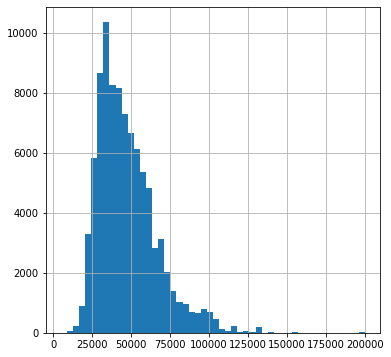

In [ ]:
# Check for the distribution of the data
combine_dfSG['avg_income'].hist(bins = 50, figsize=(6,6))

The skewness in avg_income after transformation is : 0.114


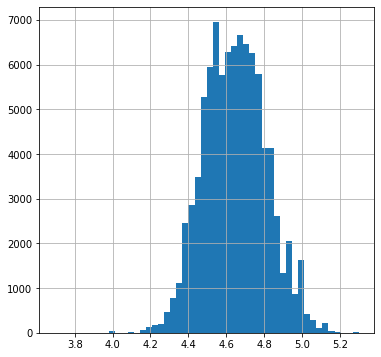

In [ ]:
# Log Transformation for the avg_income field

combine_dfSG['avg_income'] = np.log10(combine_dfSG['avg_income'])
print(f"The skewness in avg_income after transformation is : {round(combine_dfSG['avg_income'].skew(axis=0),3)}")
combine_dfSG['avg_income'].hist(bins = 50, figsize=(6,6))

In [ ]:
# Divide the data into independent features and dependent feature
Xdf_SG = combine_dfSG.drop(columns='Enroll')
ydf_SG = combine_dfSG['Enroll']

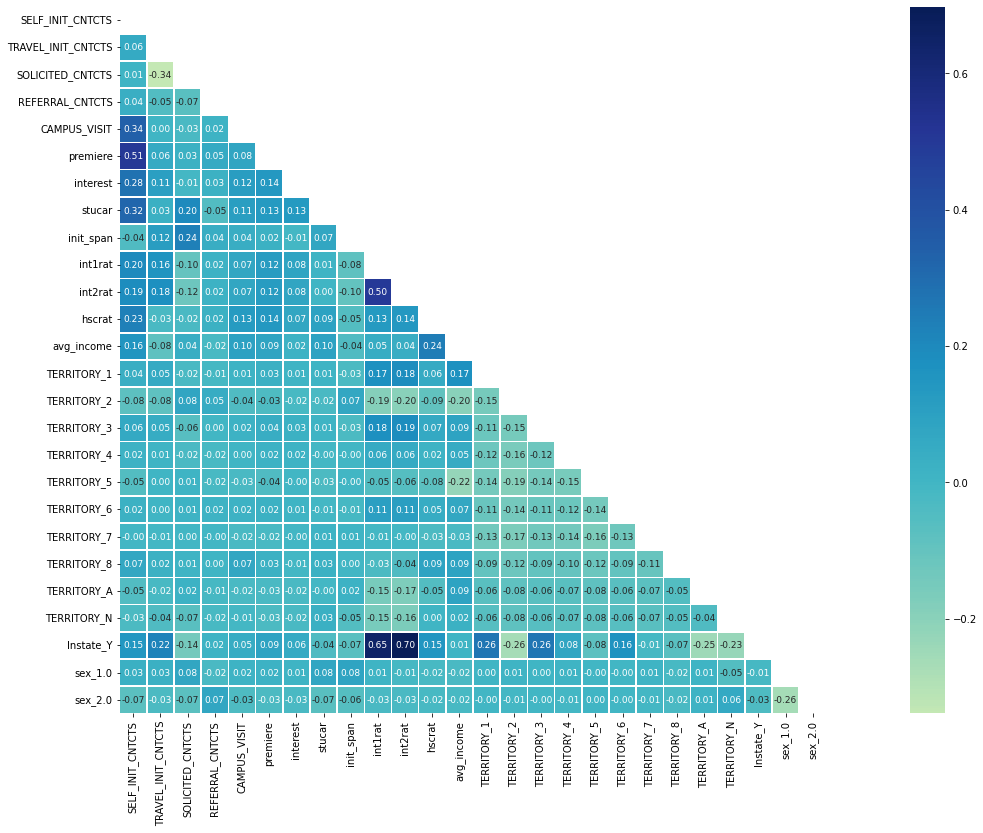

In [ ]:
# Create the correlation matrix, by not considering response feature 'Enroll'
plt.figure(figsize=(30,13))
corr_X = Xdf_SG.corr()
mask = np.zeros_like(corr_X)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_X, mask=mask, cmap='YlGnBu', center=0,
            square=True,linewidths=.5,annot=True,fmt='.2f',
            annot_kws={
                        'fontsize': 9                        
                      }
           )

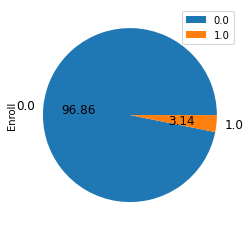

In [ ]:
# Check the balance of the response variable
ydf_SG.value_counts().plot.pie(autopct='%.2f',legend=True,fontsize=12)

##**Logistic Regression without handling class imbalance**##

In [ ]:
# Split the data using stratify method, to avoid only one class data seep in train
train_XSG, val_XSG, train_ySG, val_ySG = train_test_split(Xdf_SG,ydf_SG,test_size=0.3,random_state=42,stratify = ydf_SG)
regression1_SG = sm.Logit(train_ySG,train_XSG).fit()
print(regression1_SG.summary())

Optimization terminated successfully.
         Current function value: 0.061884
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 Enroll   No. Observations:                64037
Model:                          Logit   Df Residuals:                    64011
Method:                           MLE   Df Model:                           25
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.5562
Time:                        16:53:14   Log-Likelihood:                -3962.9
converged:                       True   LL-Null:                       -8928.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
SELF_INIT_CNTCTS       0.4591      0.015     30.541      0.000       0.430       0.489
TRAV

In [ ]:
# Calculate the confusion matrix
prediction_probab1_SG = regression1_SG.predict(val_XSG)
prediction_SG1 = list(map(round,prediction_probab1_SG))
confusion_matrix(val_ySG,prediction_SG1)

array([[26394,   191],
       [  513,   347]])

Logistic : ROC AUC = 0.978


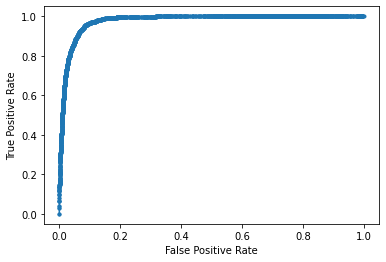

In [ ]:
# Calculate roc metric 
regression1_SG_auc = roc_auc_score(val_ySG,prediction_probab1_SG)
print('Logistic : ROC AUC = %.3f' % (regression1_SG_auc))

regression1_SG_fpr,regression1_SG_tpr,_ = roc_curve(val_ySG,prediction_probab1_SG)
plt.plot(regression1_SG_fpr,regression1_SG_tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [ ]:
# Calculate Recall and Precision
print(classification_report(val_ySG, prediction_SG1))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     26585
         1.0       0.64      0.40      0.50       860

    accuracy                           0.97     27445
   macro avg       0.81      0.70      0.74     27445
weighted avg       0.97      0.97      0.97     27445



In [ ]:
# Accuracy Score to find underfitting & overfitting
pred_prob_score = regression1_SG.predict(train_XSG)
pred = list(map(float,list(map(round,pred_prob_score))))

print(f'Training accuracy is: {accuracy_score(train_ySG, pred )}')
print(f'Validation accuracy is: {accuracy_score(val_ySG, prediction_SG1)}')

Training accuracy is: 0.9754985399066165
Validation accuracy is: 0.9743486973947896


##**Logistic Regression by handling class imbalance using SMOTE**##

In [ ]:
# Create a balanced response variable 
from imblearn.over_sampling import SMOTE

smote_SG = SMOTE(random_state=42)
sm_XSG, sm_ySG = smote_SG.fit_resample(Xdf_SG,ydf_SG)
sm_ySG.value_counts(normalize=True)*100

0.0    50.0
1.0    50.0
Name: Enroll, dtype: float64

In [ ]:
# Imbalanced target variable rectified using SMOTE(hybrid method of under and over sampling)
train_sm_XSG , val_sm_XSG , train_sm_ySG , val_sm_ySG = train_test_split(sm_XSG, sm_ySG, test_size=0.3, random_state=42)
regression2_SG = sm.Logit(train_sm_ySG,train_sm_XSG).fit()
print(regression2_SG.summary())

Optimization terminated successfully.
         Current function value: 0.171590
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 Enroll   No. Observations:               124059
Model:                          Logit   Df Residuals:                   124033
Method:                           MLE   Df Model:                           25
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.7524
Time:                        16:53:16   Log-Likelihood:                -21287.
converged:                       True   LL-Null:                       -85991.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
SELF_INIT_CNTCTS       0.7467      0.009     85.627      0.000       0.730       0.764
TRAV

In [ ]:
# Calculate the confusion matrix
prediction_probab2_SG = regression2_SG.predict(val_sm_XSG)
prediction_SG2 = list(map(round,prediction_probab2_SG))
confusion_matrix(val_sm_ySG,prediction_SG2)

array([[24413,  2046],
       [ 1466, 25244]])

Logistic : ROC AUC = 0.979


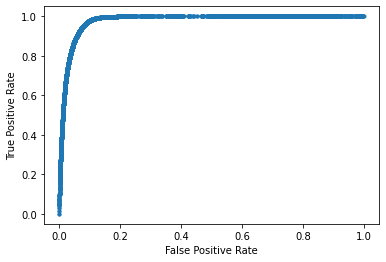

In [ ]:
# Calculate roc metric 
regression2_SG_auc = roc_auc_score(val_sm_ySG,prediction_probab2_SG)
print('Logistic : ROC AUC = %.3f' % (regression2_SG_auc))

regression2_SG_fpr,regression2_SG_tpr,_ = roc_curve(val_sm_ySG,prediction_probab2_SG)
plt.plot(regression2_SG_fpr,regression2_SG_tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# Calculate Recall and Precision
print(classification_report(val_sm_ySG,prediction_SG2))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     26459
         1.0       0.93      0.95      0.93     26710

    accuracy                           0.93     53169
   macro avg       0.93      0.93      0.93     53169
weighted avg       0.93      0.93      0.93     53169



In [ ]:
# Accuracy Score to find underfitting & overfitting
pred_prob_score1 = regression2_SG.predict(train_sm_XSG)
pred1 = list(map(float,list(map(round,pred_prob_score1))))

print(f'Training accuracy is: {accuracy_score(train_sm_ySG, pred1 )}')
print(f'Validation accuracy is: {accuracy_score(val_sm_ySG, prediction_SG2)}')

Training accuracy is: 0.9376183912493249
Validation accuracy is: 0.933946472568602


##**Decision Tree on Imbalanced Data**##

In [ ]:
# We would not require the transformation on the avg_income for decision trees
tree_XSG = tree_combine_dfSG.drop(columns='Enroll')
tree_ySG = tree_combine_dfSG['Enroll']

# Data Partition
train_tree_XSG , val_tree_XSG, train_tree_ySG , val_tree_ySG = train_test_split(tree_XSG , tree_ySG, test_size=0.3, random_state = 42, stratify=tree_ySG)

In [ ]:
# Hyperparameter tuning to identify the best max_depth and min_samples_split
tuning_parameters_SG = {'max_depth' : np.arange(4,25,1,dtype=int),
                        'min_samples_split' : np.arange(3,8,1,dtype=int)                       
                        }
tree1_SG = DecisionTreeClassifier(random_state=42)
tree1_grid_SG = GridSearchCV(tree1_SG, param_grid= tuning_parameters_SG, cv = 5, n_jobs=-1)
tree1_grid_SG.fit(train_tree_XSG,train_tree_ySG)
# Print the best values of the parameters
tree1_grid_SG.best_params_

{'max_depth': 5, 'min_samples_split': 4}

[Text(0.5208333333333334, 0.9166666666666666, 'SELF_INIT_CNTCTS <= 4.5\ngini = 0.061\nsamples = 64037\nvalue = [62029, 2008]\nclass = y[0]'),
 Text(0.2760416666666667, 0.75, 'SELF_INIT_CNTCTS <= 2.5\ngini = 0.025\nsamples = 60597\nvalue = [59831, 766]\nclass = y[0]'),
 Text(0.13541666666666666, 0.5833333333333334, 'hscrat <= 0.583\ngini = 0.008\nsamples = 55431\nvalue = [55216, 215]\nclass = y[0]'),
 Text(0.08333333333333333, 0.4166666666666667, 'SELF_INIT_CNTCTS <= 1.5\ngini = 0.007\nsamples = 55407\nvalue = [55212, 195]\nclass = y[0]'),
 Text(0.041666666666666664, 0.25, 'hscrat <= 0.071\ngini = 0.002\nsamples = 48342\nvalue = [48286, 56]\nclass = y[0]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.001\nsamples = 42434\nvalue = [42418, 16]\nclass = y[0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.013\nsamples = 5908\nvalue = [5868, 40]\nclass = y[0]'),
 Text(0.125, 0.25, 'hscrat <= 0.07\ngini = 0.039\nsamples = 7065\nvalue = [6926, 139]\nclass = y[0]'),
 Text(0.1041

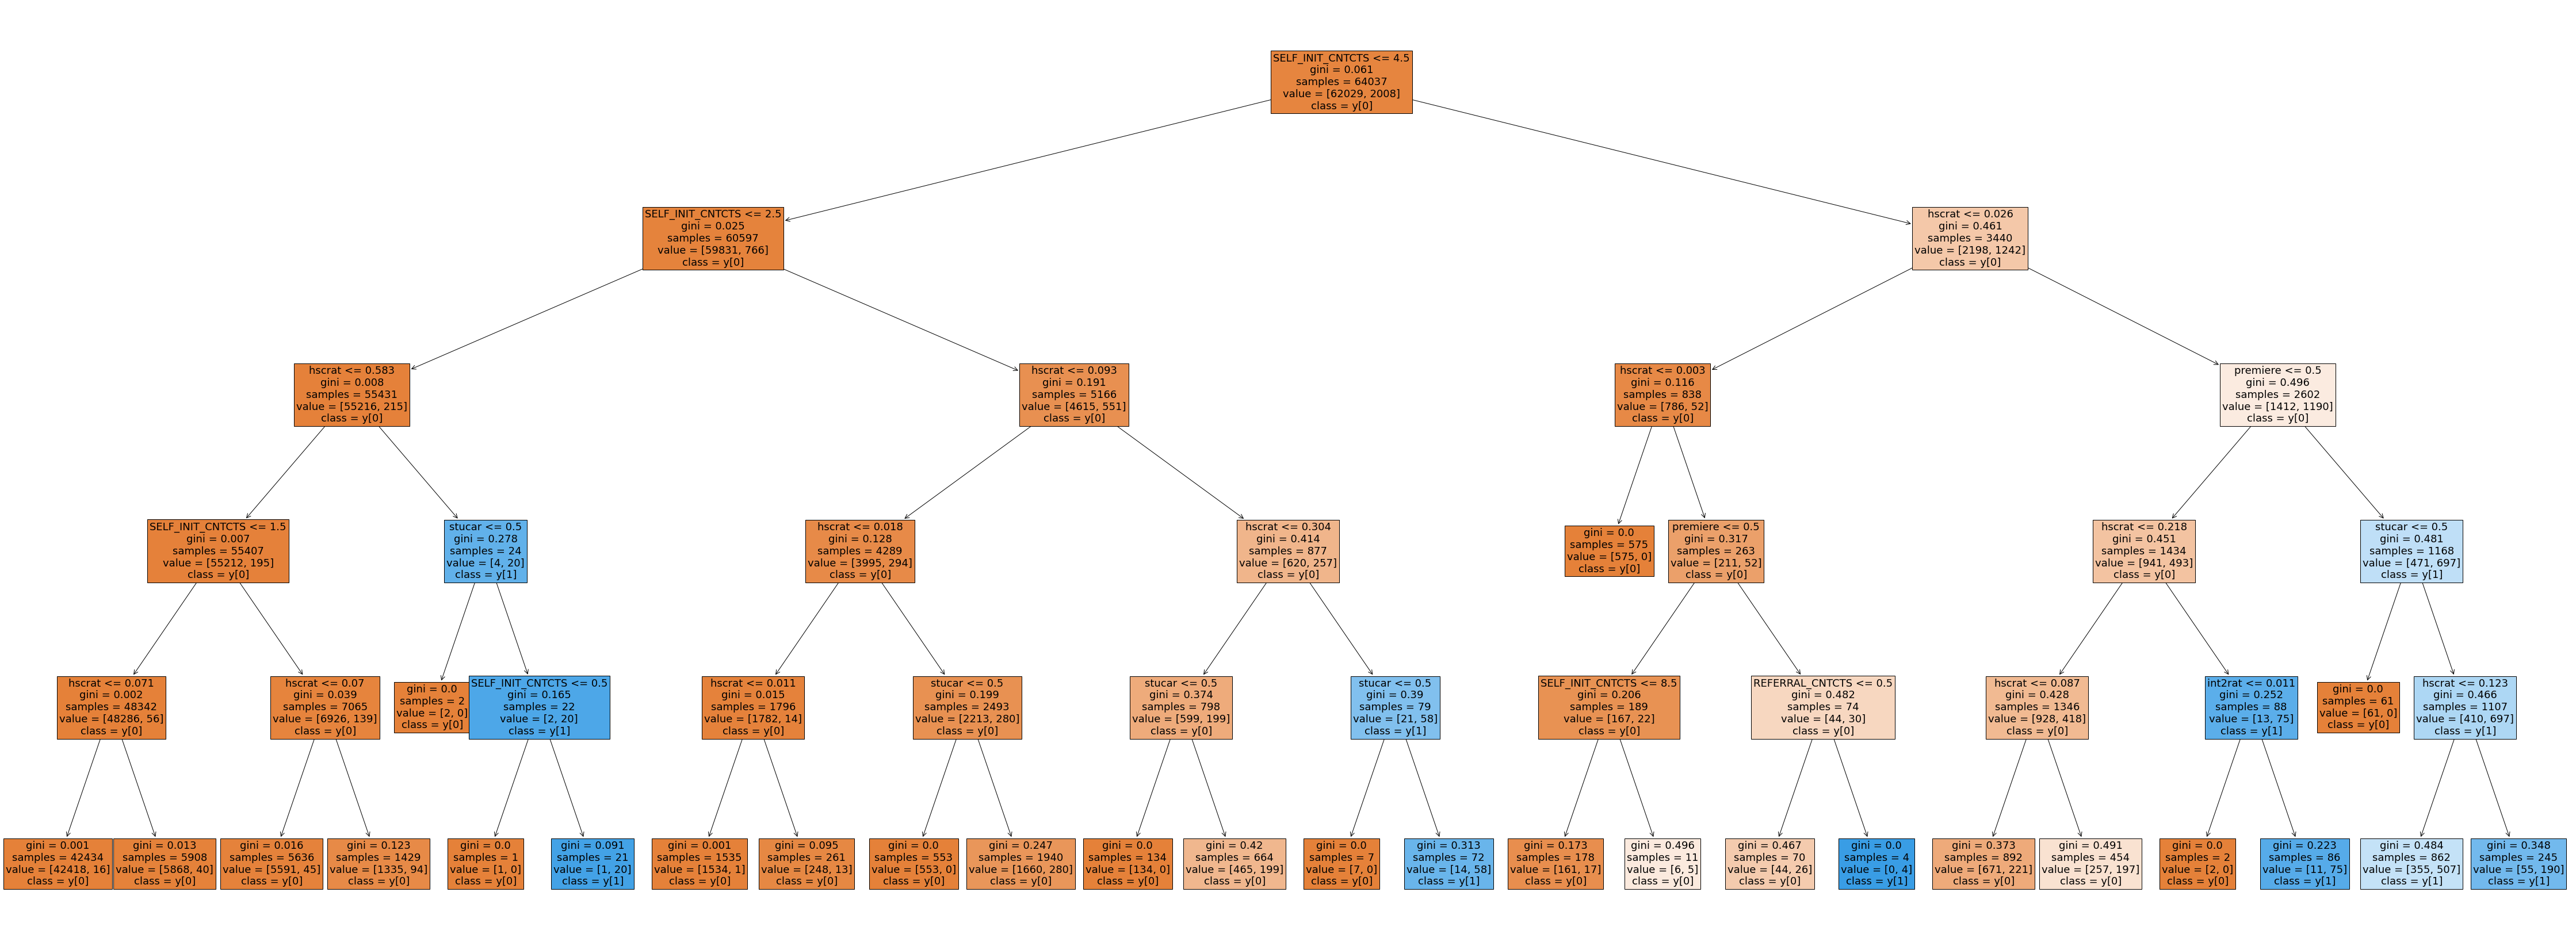

In [ ]:
tree_SG = DecisionTreeClassifier(max_depth = 5, min_samples_split=4, random_state=42)
tree_SG.fit(train_tree_XSG , train_tree_ySG)

plt.figure(figsize=(80,30))
plot_tree(tree_SG,
          feature_names=list(train_tree_XSG.columns.values),
          class_names=True,
          filled=True, fontsize=18)

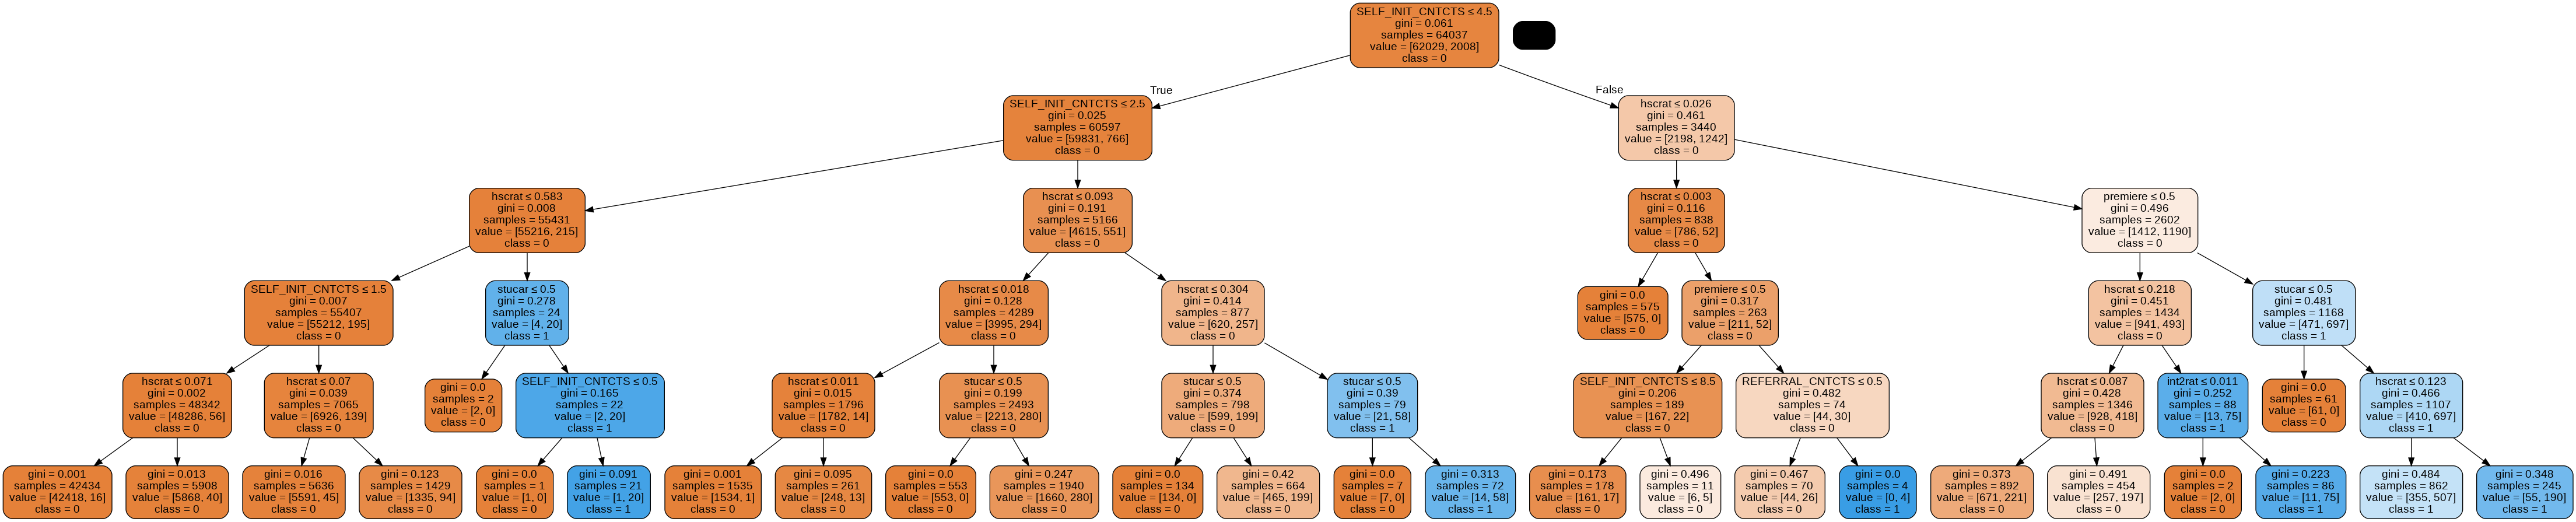

In [ ]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(tree_SG, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(train_tree_XSG.columns.values),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('enroll.png')
Image(graph.create_png())


In [ ]:
tree_prediction_SG = tree_SG.predict(val_tree_XSG)
confusion_matrix(val_tree_ySG,tree_prediction_SG)

array([[26402,   183],
       [  517,   343]])

Decision Tree : ROC AUC = 0.967


Text(0, 0.5, 'True Positive Rate')

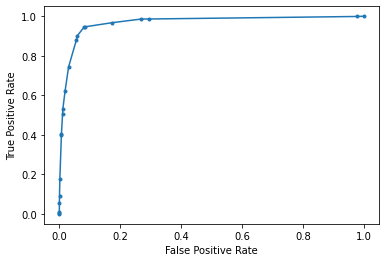

In [ ]:
tree_predict_probab_SG = tree_SG.predict_proba(val_tree_XSG)
tree_auc = roc_auc_score(val_tree_ySG,tree_predict_probab_SG[:,1])
print('Decision Tree : ROC AUC = %.3f' % (tree_auc))

tree_fpr,tree_tpr,_ = roc_curve(val_tree_ySG,tree_predict_probab_SG[:,1])
plt.plot(tree_fpr,tree_tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
# Calculate Recall and Precision
print(classification_report(val_tree_ySG,tree_prediction_SG))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     26585
         1.0       0.65      0.40      0.49       860

    accuracy                           0.97     27445
   macro avg       0.82      0.70      0.74     27445
weighted avg       0.97      0.97      0.97     27445



In [ ]:
print(f'Training accuracy is : {round(tree_SG.score(train_tree_XSG,train_tree_ySG),4)}')
print(f'Validation accuracy is : {round(tree_SG.score(val_tree_XSG,val_tree_ySG),4)}')
# print(accuracy_score(val_tree_ySG,tree_prediction_SG ))

Training accuracy is : 0.9752
Validation accuracy is : 0.9745


##**Decision Tree by balancing Response variable Data**##

In [ ]:
smote_SG1 = SMOTE(random_state=42)
tree_sm_XSG, tree_sm_ySG = smote_SG.fit_resample(tree_XSG,tree_ySG)

# Data Partition
train_treesm_XSG , val_treesm_XSG, train_treesm_ySG , val_treesm_ySG = train_test_split(tree_sm_XSG , tree_sm_ySG, test_size=0.3, random_state = 42)

# Picking the best parameter values by hypertuning
tree2_SG = DecisionTreeClassifier(random_state=42)
tree2_grid_SG = GridSearchCV(tree2_SG, param_grid= tuning_parameters_SG, cv = 5, n_jobs=-1)
tree2_grid_SG.fit(train_treesm_XSG,train_treesm_ySG)
# Print the best values of the parameters
tree2_grid_SG.best_params_

{'max_depth': 18, 'min_samples_split': 4}

In [ ]:
balancedtree_SG = DecisionTreeClassifier(max_depth = 4, min_samples_split=4, random_state=42)
balancedtree_SG.fit(train_treesm_XSG,train_treesm_ySG)

balancedtree_prediction_SG = balancedtree_SG.predict(val_treesm_XSG)
confusion_matrix(val_treesm_ySG,balancedtree_prediction_SG)

array([[24882,  1577],
       [  348, 26362]])

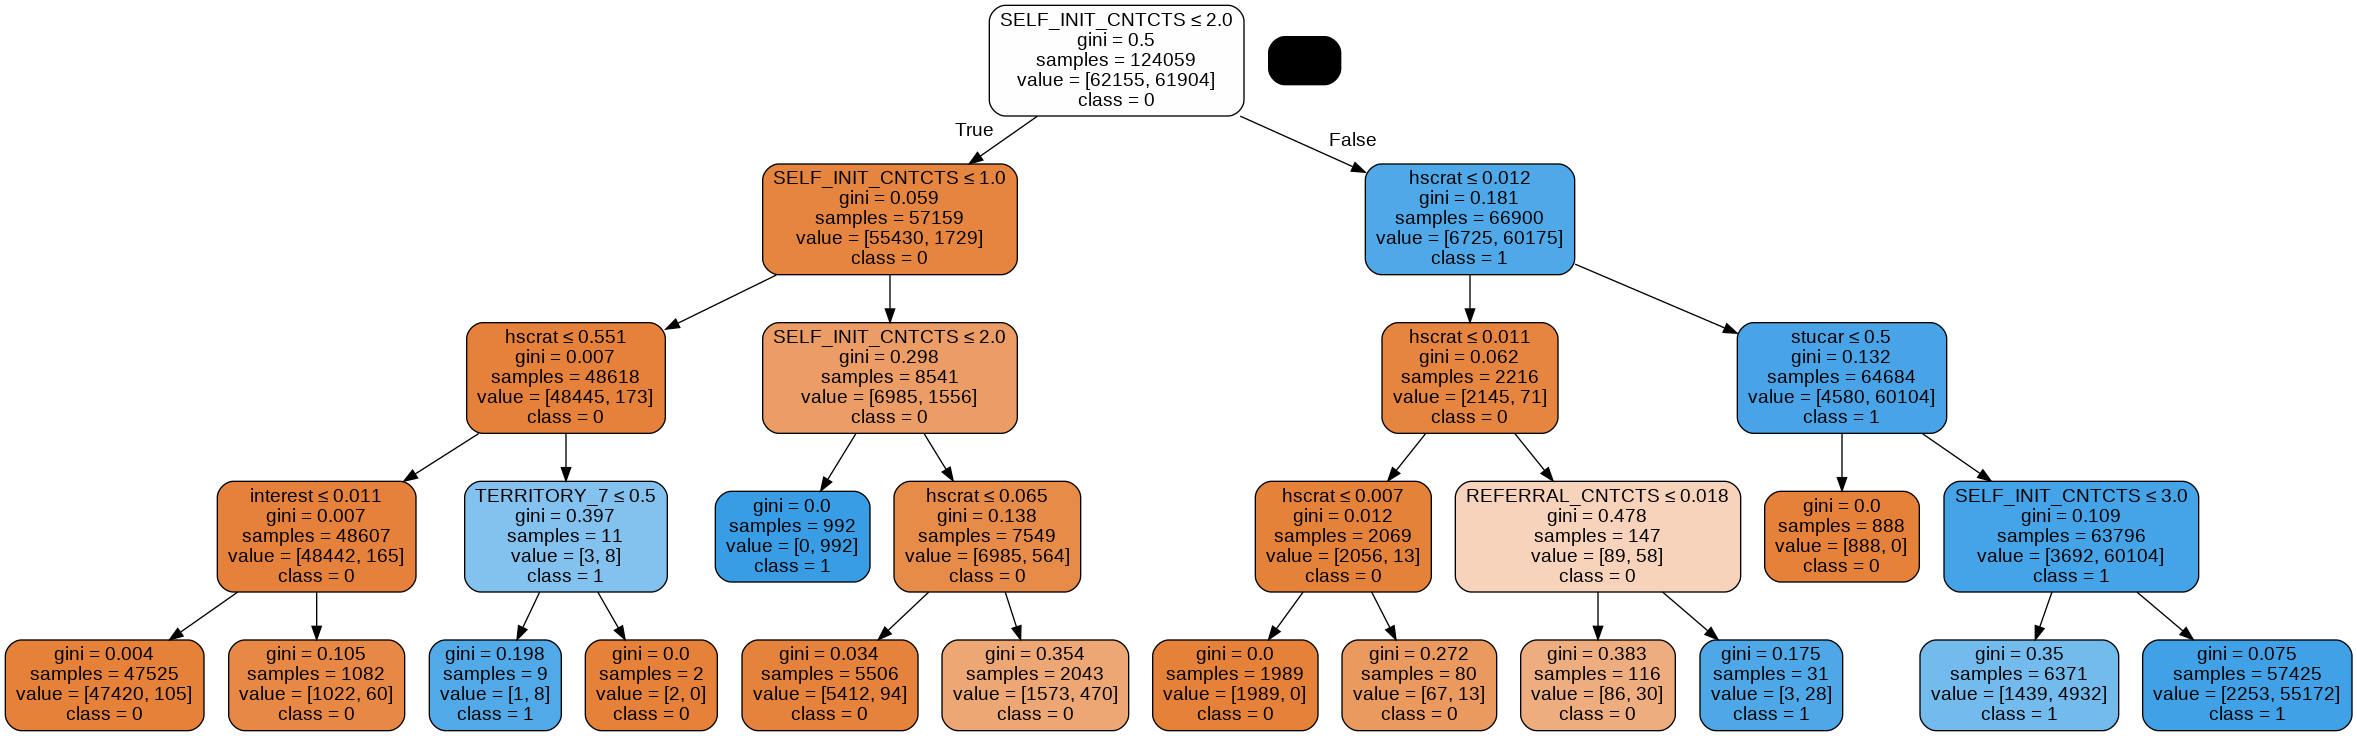

In [ ]:
dot_data1 = StringIO()
export_graphviz(balancedtree_SG, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(train_treesm_XSG.columns.values),class_names=['0','1'])
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph1.write_png('enroll1.png')
Image(graph1.create_png())

Decision Tree : ROC AUC = 0.978


Text(0, 0.5, 'True Positive Rate')

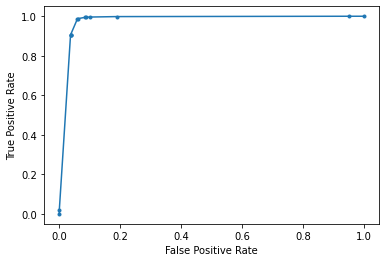

In [ ]:
baltree_predict_probab_SG = balancedtree_SG.predict_proba(val_treesm_XSG)
baltree_auc = roc_auc_score(val_treesm_ySG,baltree_predict_probab_SG[:,1])
print('Decision Tree : ROC AUC = %.3f' % (baltree_auc))

baltree_fpr, baltree_tpr,_ = roc_curve(val_treesm_ySG,baltree_predict_probab_SG[:,1])
plt.plot(baltree_fpr, baltree_tpr,marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
print(f'Training accuracy is : {round(balancedtree_SG.score(train_treesm_XSG,train_treesm_ySG),4)}')
print(f'Validation accuracy is : {round(tree_SG.score(val_treesm_XSG,val_treesm_ySG),4)}')

Training accuracy is : 0.964
Validation accuracy is : 0.7104


In [ ]:
# Calculate Recall and Precision
print(classification_report(val_treesm_ySG,balancedtree_prediction_SG))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     26459
         1.0       0.94      0.99      0.96     26710

    accuracy                           0.96     53169
   macro avg       0.96      0.96      0.96     53169
weighted avg       0.96      0.96      0.96     53169



In [ ]:
# # To get all columns of the data when condition is met
# from google.colab import data_table
# data_table.DataTable(combine_dfSG[combine_dfSG['init_span'] < 0], max_columns=28 )
